In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [4]:
iris.target[0]

0

In [5]:
iris.feature_names[0]

'sepal length (cm)'

In [6]:
iris.data_module[0]

's'

In [7]:
iris.filename[0]

'i'

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
model = LogisticRegression()

In [9]:
bestX_train, bestX_test, besty_train, besty_test = [], [], [], []
max_score = 1

for i in range(len(iris.data)//10):
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
#     print(f"Iteration {i+1}: Train Score = {train_score}, Test Score = {test_score}")
    if abs(test_score - train_score) < max_score:
        max_score = abs(test_score - train_score  )
        bestX_train = X_train
        bestX_test = X_test
        besty_train = y_train
        besty_test = y_test

C:\Users\Shankha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Shankha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

In [10]:
model = LogisticRegression()

In [11]:
model.fit(bestX_train, besty_train)

LogisticRegression()

In [12]:
model.score(bestX_test, besty_test)

0.9666666666666667

In [17]:
model.predict(bestX_test[0][0])

ValueError: Expected 2D array, got scalar array instead:
array=5.0.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [13]:
y_pred = model.predict(bestX_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(besty_test, y_pred)

Text(95.72222222222221, 0.5, 'Predict')

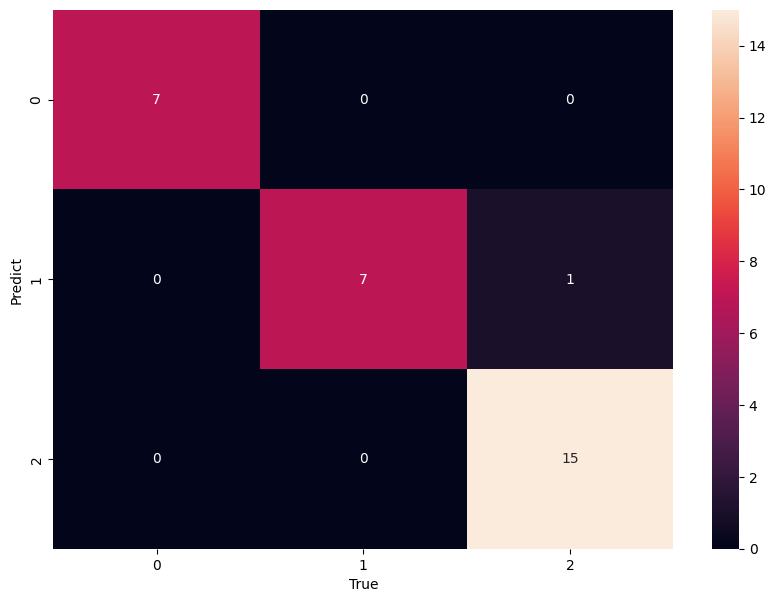

In [14]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot = True)
plt.xlabel('True')
plt.ylabel('Predict')

In [15]:
pickle.dump(model, open('model.pkl', 'wb'))